In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [589]:
# Loading County State Data_No Dom Knowledge csv dataset
df1 = pd.read_csv("County State Data_No Dom Knowledge.csv") 
df1

,County,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),...,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,...,15%,87%,41%,75%,83%,89%,NaN,NaN,NaN,NaN
1,AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,...,12%,83%,38%,77%,85%,90%,NaN,NaN,NaN,NaN
2,AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,...,15%,84%,37%,62%,65%,75%,NaN,NaN,NaN,NaN
3,AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,...,11%,88%,55%,75%,76%,81%,NaN,NaN,NaN,NaN
4,AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,...,10%,88%,60%,76%,80%,83%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,...,10%,76%,19%,75%,87%,93%,NaN,NaN,NaN,NaN
3103,WY: Teton,18%,22%,8.7,19%,96%,9%,4%,27%,18%,...,18%,66%,16%,56%,89%,95%,NaN,NaN,NaN,NaN
3104,WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,...,11%,79%,18%,77%,91%,93%,NaN,NaN,NaN,NaN
3105,WY: Washakie,0%,29%,8.3,26%,76%,12%,3%,32%,18%,...,8%,84%,8%,73%,83%,92%,NaN,NaN,NaN,NaN


In [590]:
# Drop all columns containing all NaN values
df1.dropna(axis='columns', how='all', inplace=True)
df1

,County,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),...,Unemployment % (Age >= 16),Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25)
0,AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,...,4.9%,"$67,600",28%,149,15%,87%,41%,75%,83%,89%
1,AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,...,5.6%,"$71,100",18%,408,12%,83%,38%,77%,85%,90%
2,AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,...,7.0%,"$38,900",54%,106,15%,84%,37%,62%,65%,75%
3,AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,...,6.6%,"$50,900",37%,20,11%,88%,55%,75%,76%,81%
4,AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,...,4.1%,"$55,200",23%,279,10%,88%,60%,76%,80%,83%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,...,7.4%,"$70,600",16%,135,10%,76%,19%,75%,87%,93%
3103,WY: Teton,18%,22%,8.7,19%,96%,9%,4%,27%,18%,...,6.0%,"$92,500",19%,NaN,18%,66%,16%,56%,89%,95%
3104,WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,...,6.3%,"$71,200",11%,14,11%,79%,18%,77%,91%,93%
3105,WY: Washakie,0%,29%,8.3,26%,76%,12%,3%,32%,18%,...,5.3%,"$58,500",16%,7,8%,84%,8%,73%,83%,92%


In [591]:
# Loading dataset containing domain knowledge column
df2 = pd.read_csv("county_complete.csv")
df2

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
3138,56039,Wyoming,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
3139,56041,Wyoming,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5
3140,56043,Wyoming,Washakie County,8289.0,8533,8460.0,8421.0,8427.0,8288.0,8296.0,...,NaN,3.8,4.1,15.0,1.5,7.0,7.8,11.9,89.7,81.9


In [592]:
#Set df2 index as State
df2.set_index("state", inplace=True)
df2

,fips,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1001,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
Alabama,1003,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,207509.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
Alabama,1005,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,25774.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
Alabama,1007,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,22633.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
Alabama,1009,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,57562.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,56037,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,44245.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
Wyoming,56039,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,23180.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
Wyoming,56041,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,20711.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5


In [593]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, Alabama to Wyoming
Columns: 187 entries, fips to white_not_hispanic_2019
dtypes: float64(166), int64(18), object(3)
memory usage: 4.5+ MB


In [594]:
# Drop Alaska, District of Columbia, and Hawaii rows
df2.drop(labels=["Alaska", "District of Columbia", "Hawaii"], axis=0, inplace=True)
df2

,fips,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1001,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
Alabama,1003,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,207509.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
Alabama,1005,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,25774.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
Alabama,1007,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,22633.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
Alabama,1009,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,57562.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,56037,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,44245.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
Wyoming,56039,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,23180.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
Wyoming,56041,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,20711.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5


In [595]:
# Reset index of df2
df2.reset_index(drop=True, inplace=True)
df2

,fips,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,207509.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,25774.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,22633.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,57562.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,56037,Sweetwater County,37613.0,43806,44013.0,45042.0,45145.0,44981.0,44732.0,44245.0,...,NaN,2.3,5.7,11.3,0.5,9.2,13.8,8.6,93.4,79.6
3103,56039,Teton County,18251.0,21294,21476.0,21709.0,22326.0,22817.0,23029.0,23180.0,...,NaN,0.7,0.7,12.7,0.0,10.1,5.9,5.3,89.3,81.3
3104,56041,Uinta County,19742.0,21118,20899.0,20999.0,20960.0,20845.0,20780.0,20711.0,...,NaN,3.5,5.5,11.2,0.6,6.8,1.8,7.4,93.4,87.5
3105,56043,Washakie County,8289.0,8533,8460.0,8421.0,8427.0,8288.0,8296.0,8188.0,...,NaN,3.8,4.1,15.0,1.5,7.0,7.8,11.9,89.7,81.9


In [596]:
df2 = df2["white_not_hispanic_2019"]
df2

0       74.6
1       83.1
2       45.8
3       74.5
4       86.9
        ... 
3102    79.6
3103    81.3
3104    87.5
3105    81.9
3106    96.4
Name: white_not_hispanic_2019, Length: 3107, dtype: float64

In [597]:
# Concatenate df1 and df2 dataframes to produce new dataframe State_Counties containing domain knowledge
State_Counties = pd.concat([df1, df2], axis=1)

In [598]:
State_Counties

,County,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019
0,AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,...,"$67,600",28%,149,15%,87%,41%,75%,83%,89%,74.6
1,AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,...,"$71,100",18%,408,12%,83%,38%,77%,85%,90%,83.1
2,AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,...,"$38,900",54%,106,15%,84%,37%,62%,65%,75%,45.8
3,AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,...,"$50,900",37%,20,11%,88%,55%,75%,76%,81%,74.5
4,AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,...,"$55,200",23%,279,10%,88%,60%,76%,80%,83%,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,...,"$70,600",16%,135,10%,76%,19%,75%,87%,93%,79.6
3103,WY: Teton,18%,22%,8.7,19%,96%,9%,4%,27%,18%,...,"$92,500",19%,NaN,18%,66%,16%,56%,89%,95%,81.3
3104,WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,...,"$71,200",11%,14,11%,79%,18%,77%,91%,93%,87.5
3105,WY: Washakie,0%,29%,8.3,26%,76%,12%,3%,32%,18%,...,"$58,500",16%,7,8%,84%,8%,73%,83%,92%,81.9


In [599]:
# Added % symbol to end of white_not_hispanic_2019 column
State_Counties.rename(columns = {"white_not_hispanic_2019": "white_not_hispanic_2019 %"}, inplace= True)
State_Counties

,County,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
0,AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,...,"$67,600",28%,149,15%,87%,41%,75%,83%,89%,74.6
1,AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,...,"$71,100",18%,408,12%,83%,38%,77%,85%,90%,83.1
2,AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,...,"$38,900",54%,106,15%,84%,37%,62%,65%,75%,45.8
3,AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,...,"$50,900",37%,20,11%,88%,55%,75%,76%,81%,74.5
4,AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,...,"$55,200",23%,279,10%,88%,60%,76%,80%,83%,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,...,"$70,600",16%,135,10%,76%,19%,75%,87%,93%,79.6
3103,WY: Teton,18%,22%,8.7,19%,96%,9%,4%,27%,18%,...,"$92,500",19%,NaN,18%,66%,16%,56%,89%,95%,81.3
3104,WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,...,"$71,200",11%,14,11%,79%,18%,77%,91%,93%,87.5
3105,WY: Washakie,0%,29%,8.3,26%,76%,12%,3%,32%,18%,...,"$58,500",16%,7,8%,84%,8%,73%,83%,92%,81.9


In [600]:
# Set index as County
State_Counties.set_index("County", inplace=True)
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,61%,...,"$67,600",28%,149,15%,87%,41%,75%,83%,89%,74.6
AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,66%,...,"$71,100",18%,408,12%,83%,38%,77%,85%,90%,83.1
AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,38%,...,"$38,900",54%,106,15%,84%,37%,62%,65%,75%,45.8
AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,38%,...,"$50,900",37%,20,11%,88%,55%,75%,76%,81%,74.5
AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,56%,...,"$55,200",23%,279,10%,88%,60%,76%,80%,83%,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,62%,...,"$70,600",16%,135,10%,76%,19%,75%,87%,93%,79.6
WY: Teton,18%,22%,8.7,19%,96%,9%,4%,27%,18%,76%,...,"$92,500",19%,NaN,18%,66%,16%,56%,89%,95%,81.3
WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,58%,...,"$71,200",11%,14,11%,79%,18%,77%,91%,93%,87.5


In [601]:
# Showing Counties with NaN Alcohol-Impaired Driving Deaths %
State_Counties[State_Counties["Alcohol-Impaired Driving Deaths %"].isna()]

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
KS: Graham,NaN,38%,8.0,31%,63%,11%,7%,34%,14%,67%,...,"$47,100",19%,3,9%,78%,12%,77%,78%,91%,88.5
KY: Robertson,NaN,39%,4.4,36%,3%,18%,29%,42%,10%,42%,...,"$49,500",16%,0,12%,90%,63%,73%,61%,84%,93.9
MN: Traverse,NaN,31%,8.6,22%,46%,10%,4%,30%,10%,68%,...,"$56,100",23%,6,10%,73%,23%,78%,77%,94%,88.7
MT: Fallon,NaN,29%,8.8,21%,2%,8%,5%,34%,12%,74%,...,"$62,600",25%,6,6%,78%,17%,72%,81%,95%,94.4
NE: Arthur,NaN,37%,4.5,31%,NaN,15%,34%,30%,12%,77%,...,"$52,500",18%,0,12%,65%,37%,70%,77%,96%,95.8
NE: Furnas,NaN,39%,8.2,31%,26%,13%,1%,32%,14%,64%,...,"$50,800",12%,3,11%,82%,19%,79%,76%,90%,93.4
NE: Hooker,NaN,34%,4.5,26%,7%,16%,33%,31%,13%,63%,...,"$53,200",14%,0,13%,66%,23%,60%,71%,94%,91.9
NE: Thomas,NaN,34%,5.0,27%,15%,12%,35%,31%,16%,84%,...,"$55,600",8%,NaN,7%,75%,15%,68%,89%,98%,95.0
NE: Wheeler,NaN,38%,5.1,31%,4%,14%,31%,33%,14%,66%,...,"$52,200",25%,2,11%,64%,23%,76%,71%,96%,96.9


In [602]:
# Dropping Counties with NaN Alcohol-Impaired Driving Deaths % 
State_Counties.dropna(subset=["Alcohol-Impaired Driving Deaths %"], inplace=True)
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,61%,...,"$67,600",28%,149,15%,87%,41%,75%,83%,89%,74.6
AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,66%,...,"$71,100",18%,408,12%,83%,38%,77%,85%,90%,83.1
AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,38%,...,"$38,900",54%,106,15%,84%,37%,62%,65%,75%,45.8
AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,38%,...,"$50,900",37%,20,11%,88%,55%,75%,76%,81%,74.5
AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,56%,...,"$55,200",23%,279,10%,88%,60%,76%,80%,83%,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,62%,...,"$70,600",16%,135,10%,76%,19%,75%,87%,93%,79.6
WY: Teton,18%,22%,8.7,19%,96%,9%,4%,27%,18%,76%,...,"$92,500",19%,NaN,18%,66%,16%,56%,89%,95%,81.3
WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,58%,...,"$71,200",11%,14,11%,79%,18%,77%,91%,93%,87.5


In [603]:
# Showing all remaining rows with NaN values
State_Counties[State_Counties.isna().any(axis=1)]

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
AL: DeKalb,27%,35%,NaN,41%,39%,17%,NaN,39%,24%,51%,...,"$47,200",20%,196,12%,84%,33%,73%,78%,78%,80.4
AL: Fayette,26%,37%,7.1,35%,26%,19%,0%,40%,15%,49%,...,"$45,900",29%,NaN,11%,82%,45%,75%,70%,84%,84.5
AL: Greene,38%,47%,4.2,46%,4%,22%,23%,48%,15%,50%,...,"$33,600",70%,55,18%,73%,39%,69%,56%,81%,17.2
AL: Perry,70%,46%,4.1,43%,52%,20%,28%,45%,16%,42%,...,"$33,700",67%,22,19%,80%,50%,78%,54%,78%,29.3
AL: Wilcox,41%,45%,4.5,44%,1%,20%,24%,44%,15%,41%,...,"$31,900",64%,72,10%,87%,43%,70%,63%,79%,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WI: Oconto,37%,35%,8.9,25%,52%,9%,2%,33%,8%,61%,...,"$66,000",15%,NaN,10%,81%,44%,83%,83%,91%,95.0
WI: Pepin,43%,35%,NaN,24%,47%,9%,NaN,32%,8%,59%,...,"$65,100",16%,9,11%,77%,42%,80%,82%,91%,96.4
WY: Crook,50%,29%,8.3,27%,64%,10%,6%,34%,18%,62%,...,"$67,400",6%,9,12%,77%,34%,79%,80%,93%,94.3


In [604]:
# Dropping all remaining rows with any NaN values
State_Counties.dropna(axis='rows', inplace=True)
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32%,35%,6.5,32%,63%,16%,13%,38%,12%,61%,...,"$67,600",28%,149,15%,87%,41%,75%,83%,89%,74.6
AL: Baldwin,32%,30%,7.4,28%,75%,13%,8%,36%,14%,66%,...,"$71,100",18%,408,12%,83%,38%,77%,85%,90%,83.1
AL: Barbour,38%,40%,5.7,42%,50%,21%,10%,41%,17%,38%,...,"$38,900",54%,106,15%,84%,37%,62%,65%,75%,45.8
AL: Bibb,21%,41%,7.6,38%,11%,16%,0%,40%,14%,38%,...,"$50,900",37%,20,11%,88%,55%,75%,76%,81%,74.5
AL: Blount,15%,39%,7.8,33%,23%,15%,3%,39%,18%,56%,...,"$55,200",23%,279,10%,88%,60%,76%,80%,83%,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sublette,40%,26%,8.1,23%,45%,12%,4%,33%,16%,66%,...,"$82,400",18%,7,6%,70%,27%,83%,88%,95%,89.3
WY: Sweetwater,18%,34%,8.1,25%,83%,11%,5%,35%,16%,62%,...,"$70,600",16%,135,10%,76%,19%,75%,87%,93%,79.6
WY: Uinta,17%,30%,8.3,28%,79%,13%,1%,36%,16%,58%,...,"$71,200",11%,14,11%,79%,18%,77%,91%,93%,87.5


In [605]:
State_Counties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, AL: Autauga to WY: Weston
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Alcohol-Impaired Driving Deaths %          2658 non-null   object 
 1   Adult Obesity %                            2658 non-null   object 
 2   Food Environment Index (0-10)              2658 non-null   float64
 3   Physically Inactive Adults %               2658 non-null   object 
 4   Access to Exercise Opportunities %         2658 non-null   object 
 5   Food Insecure %                            2658 non-null   object 
 6   Limited Access to Healthy Foods %          2658 non-null   object 
 7   Insufficient Sleep % (Avg Hours < 7)       2658 non-null   object 
 8   Uninsured Adults % (Age < 65)              2658 non-null   object 
 9   Some College % (Adults 25-44)              2658 non-null   object 
 10  School Segreg

In [606]:
# Converting Driving Deaths % Object Dtype to int 
State_Counties["Alcohol-Impaired Driving Deaths %"]= State_Counties["Alcohol-Impaired Driving Deaths %"].str.rstrip("%").astype(int)
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35%,6.5,32%,63%,16%,13%,38%,12%,61%,...,"$67,600",28%,149,15%,87%,41%,75%,83%,89%,74.6
AL: Baldwin,32,30%,7.4,28%,75%,13%,8%,36%,14%,66%,...,"$71,100",18%,408,12%,83%,38%,77%,85%,90%,83.1
AL: Barbour,38,40%,5.7,42%,50%,21%,10%,41%,17%,38%,...,"$38,900",54%,106,15%,84%,37%,62%,65%,75%,45.8
AL: Bibb,21,41%,7.6,38%,11%,16%,0%,40%,14%,38%,...,"$50,900",37%,20,11%,88%,55%,75%,76%,81%,74.5
AL: Blount,15,39%,7.8,33%,23%,15%,3%,39%,18%,56%,...,"$55,200",23%,279,10%,88%,60%,76%,80%,83%,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sublette,40,26%,8.1,23%,45%,12%,4%,33%,16%,66%,...,"$82,400",18%,7,6%,70%,27%,83%,88%,95%,89.3
WY: Sweetwater,18,34%,8.1,25%,83%,11%,5%,35%,16%,62%,...,"$70,600",16%,135,10%,76%,19%,75%,87%,93%,79.6
WY: Uinta,17,30%,8.3,28%,79%,13%,1%,36%,16%,58%,...,"$71,200",11%,14,11%,79%,18%,77%,91%,93%,87.5


In [607]:
State_Counties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, AL: Autauga to WY: Weston
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Alcohol-Impaired Driving Deaths %          2658 non-null   int64  
 1   Adult Obesity %                            2658 non-null   object 
 2   Food Environment Index (0-10)              2658 non-null   float64
 3   Physically Inactive Adults %               2658 non-null   object 
 4   Access to Exercise Opportunities %         2658 non-null   object 
 5   Food Insecure %                            2658 non-null   object 
 6   Limited Access to Healthy Foods %          2658 non-null   object 
 7   Insufficient Sleep % (Avg Hours < 7)       2658 non-null   object 
 8   Uninsured Adults % (Age < 65)              2658 non-null   object 
 9   Some College % (Adults 25-44)              2658 non-null   object 
 10  School Segreg

In [608]:
# Sorting Counties by Driving Deaths % in decending order
State_Counties.sort_values("Alcohol-Impaired Driving Deaths %", ascending=False)

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
MN: Jackson,100,32%,8.9,22%,51%,7%,5%,30%,7%,71%,...,"$62,800",12%,3,9%,78%,15%,83%,82%,93%,92.4
MN: Red Lake,100,33%,6.4,24%,49%,10%,26%,31%,8%,72%,...,"$68,700",20%,1,8%,77%,33%,82%,79%,94%,92.1
MN: Cook,100,31%,7.9,20%,79%,10%,9%,29%,11%,75%,...,"$58,600",18%,4,18%,67%,21%,77%,88%,97%,85.5
SD: Spink,100,33%,7.9,31%,44%,9%,12%,30%,12%,70%,...,"$53,300",18%,2,9%,75%,26%,75%,84%,92%,93.7
ND: Bowman,100,36%,9.8,28%,62%,4%,3%,32%,10%,71%,...,"$67,100",14%,4,9%,78%,16%,81%,86%,90%,92.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TX: Cochran,0,42%,6.6,41%,1%,17%,9%,38%,33%,38%,...,"$44,600",19%,6,13%,84%,38%,72%,72%,70%,36.1
KS: Sheridan,0,37%,7.8,29%,53%,9%,12%,34%,16%,75%,...,"$58,200",22%,3,9%,65%,23%,80%,84%,96%,93.0
KS: Cheyenne,0,36%,7.9,30%,57%,11%,8%,34%,17%,72%,...,"$50,600",26%,4,7%,75%,15%,79%,82%,93%,93.1


In [609]:
State_Counties["Alcohol-Impaired Driving Deaths %"].mean()

27.321670428893906

In [610]:
State_Counties["Alcohol-Impaired Driving Deaths %"].median()

27.0

In [611]:
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=0.0))
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=0.25))
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=0.30))
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=0.5))
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=0.68))
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=0.75))
print(State_Counties["Alcohol-Impaired Driving Deaths %"].quantile(q=1))

0.0
19.0
21.0
27.0
32.0
33.75
100.0


In [612]:
# Converting all remaining non-numeric datatypes to numeric ones 
State_Counties["Adult Obesity %"]= State_Counties["Adult Obesity %"].str.rstrip("%").astype(int)
State_Counties["Physically Inactive Adults %"]= State_Counties["Physically Inactive Adults %"].str.rstrip("%").astype(int)
State_Counties["Access to Exercise Opportunities %"]= State_Counties["Access to Exercise Opportunities %"].str.rstrip("%").astype(int)
State_Counties["Food Insecure %"]= State_Counties["Food Insecure %"].str.rstrip("%").astype(int)

State_Counties["Limited Access to Healthy Foods %"]= State_Counties["Limited Access to Healthy Foods %"].str.rstrip("%").astype(int)
State_Counties["Insufficient Sleep % (Avg Hours < 7)"]= State_Counties["Insufficient Sleep % (Avg Hours < 7)"].str.rstrip("%").astype(int)
State_Counties["Uninsured Adults % (Age < 65)"]= State_Counties["Uninsured Adults % (Age < 65)"].str.rstrip("%").astype(int)
State_Counties["Some College % (Adults 25-44)"]= State_Counties["Some College % (Adults 25-44)"].str.rstrip("%").astype(int)

State_Counties["Unemployment % (Age >= 16)"]= State_Counties["Unemployment % (Age >= 16)"].str.rstrip("%").astype(float)

State_Counties["Median Household Income"]= State_Counties["Median Household Income"].str.lstrip("$").str.replace(",","").astype(int)
State_Counties["Children Single-Parent Households %"]= State_Counties["Children Single-Parent Households %"].str.rstrip("%").astype(int)
State_Counties["Annual Average Violent Crimes"]= State_Counties["Annual Average Violent Crimes"].str.replace(",","").astype(int)
State_Counties["Severe Housing Problems %"]= State_Counties["Severe Housing Problems %"].str.rstrip("%").astype(int)

State_Counties["Drive Alone to Work %"]= State_Counties["Drive Alone to Work %"].str.rstrip("%").astype(int)
State_Counties["Drive Alone Long Commute % (Minutes > 30)"]= State_Counties["Drive Alone Long Commute % (Minutes > 30)"].str.rstrip("%").astype(int)
State_Counties["Homeowners %"]= State_Counties["Homeowners %"].str.rstrip("%").astype(int)
State_Counties["Broadband Internet Access %"]= State_Counties["Broadband Internet Access %"].str.rstrip("%").astype(int)
State_Counties["High School Completion % (Adults >= 25)"]= State_Counties["High School Completion % (Adults >= 25)"].str.rstrip("%").astype(int)

In [613]:
State_Counties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, AL: Autauga to WY: Weston
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Alcohol-Impaired Driving Deaths %          2658 non-null   int64  
 1   Adult Obesity %                            2658 non-null   int64  
 2   Food Environment Index (0-10)              2658 non-null   float64
 3   Physically Inactive Adults %               2658 non-null   int64  
 4   Access to Exercise Opportunities %         2658 non-null   int64  
 5   Food Insecure %                            2658 non-null   int64  
 6   Limited Access to Healthy Foods %          2658 non-null   int64  
 7   Insufficient Sleep % (Avg Hours < 7)       2658 non-null   int64  
 8   Uninsured Adults % (Age < 65)              2658 non-null   int64  
 9   Some College % (Adults 25-44)              2658 non-null   int64  
 10  School Segreg

In [614]:
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Median Household Income,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35,6.5,32,63,16,13,38,12,61,...,67600,28,149,15,87,41,75,83,89,74.6
AL: Baldwin,32,30,7.4,28,75,13,8,36,14,66,...,71100,18,408,12,83,38,77,85,90,83.1
AL: Barbour,38,40,5.7,42,50,21,10,41,17,38,...,38900,54,106,15,84,37,62,65,75,45.8
AL: Bibb,21,41,7.6,38,11,16,0,40,14,38,...,50900,37,20,11,88,55,75,76,81,74.5
AL: Blount,15,39,7.8,33,23,15,3,39,18,56,...,55200,23,279,10,88,60,76,80,83,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sublette,40,26,8.1,23,45,12,4,33,16,66,...,82400,18,7,6,70,27,83,88,95,89.3
WY: Sweetwater,18,34,8.1,25,83,11,5,35,16,62,...,70600,16,135,10,76,19,75,87,93,79.6
WY: Uinta,17,30,8.3,28,79,13,1,36,16,58,...,71200,11,14,11,79,18,77,91,93,87.5


Creating array named **conditions** to store **Driving Deaths %** threshold values for risk level classification

In [615]:
conditions = [
    (State_Counties["Alcohol-Impaired Driving Deaths %"] < 21),
    (State_Counties["Alcohol-Impaired Driving Deaths %"] >= 21),
]

Creating array named **values** to store **low** and **high** risk levels corresponding to **%** threshold

In [616]:
values = [0,1]

Adding new column **risk level** to classify counties risk as **low = 0** or **high = 1**

In [617]:
State_Counties["Risk Level"] = np.select(conditions, values)
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35,6.5,32,63,16,13,38,12,61,...,28,149,15,87,41,75,83,89,74.6,1
AL: Baldwin,32,30,7.4,28,75,13,8,36,14,66,...,18,408,12,83,38,77,85,90,83.1,1
AL: Barbour,38,40,5.7,42,50,21,10,41,17,38,...,54,106,15,84,37,62,65,75,45.8,1
AL: Bibb,21,41,7.6,38,11,16,0,40,14,38,...,37,20,11,88,55,75,76,81,74.5,1
AL: Blount,15,39,7.8,33,23,15,3,39,18,56,...,23,279,10,88,60,76,80,83,86.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sublette,40,26,8.1,23,45,12,4,33,16,66,...,18,7,6,70,27,83,88,95,89.3,1
WY: Sweetwater,18,34,8.1,25,83,11,5,35,16,62,...,16,135,10,76,19,75,87,93,79.6,0
WY: Uinta,17,30,8.3,28,79,13,1,36,16,58,...,11,14,11,79,18,77,91,93,87.5,0


In [618]:
State_Counties.head(50)

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35,6.5,32,63,16,13,38,12,61,...,28,149,15,87,41,75,83,89,74.6,1
AL: Baldwin,32,30,7.4,28,75,13,8,36,14,66,...,18,408,12,83,38,77,85,90,83.1,1
AL: Barbour,38,40,5.7,42,50,21,10,41,17,38,...,54,106,15,84,37,62,65,75,45.8,1
AL: Bibb,21,41,7.6,38,11,16,0,40,14,38,...,37,20,11,88,55,75,76,81,74.5,1
AL: Blount,15,39,7.8,33,23,15,3,39,18,56,...,23,279,10,88,60,76,80,83,86.9,0
AL: Bullock,35,44,4.6,41,2,16,32,45,15,28,...,59,33,17,80,47,74,61,75,21.4,1
AL: Butler,35,40,6.9,41,42,17,7,42,15,37,...,41,117,13,86,37,73,74,86,51.6,1
AL: Calhoun,14,36,5.9,33,49,17,15,38,15,58,...,31,871,13,85,30,70,80,85,72.1,0
AL: Chambers,30,40,7.0,37,57,15,8,41,15,54,...,32,181,15,87,31,67,75,83,55.5,1


In [619]:
State_Counties[["School Segregation Index","Unemployment % (Age >= 16)"]].head()

,School Segregation Index,Unemployment % (Age >= 16)
County,,
AL: Autauga,0.06,4.9
AL: Baldwin,0.09,5.6
AL: Barbour,0.04,7.0
AL: Bibb,0.09,6.6
AL: Blount,0.11,4.1


In [620]:
State_Counties.tail(50)

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level
County,,,,,,,,,,,,,,,,,,,,,
WI: Milwaukee,27,38,8.3,26,97,12,2,36,11,66,...,41,9770,21,76,26,49,81,89,51.2,1
WI: Monroe,32,35,8.3,26,52,10,7,33,10,62,...,17,64,12,77,24,71,81,91,90.5,1
WI: Oneida,48,35,8.9,23,60,9,2,31,8,68,...,13,61,10,82,21,83,84,94,94.9,1
WI: Outagamie,38,34,8.8,21,81,8,5,33,8,73,...,15,280,10,84,21,71,88,94,87.5,1
WI: Ozaukee,31,32,9.2,18,85,6,5,30,5,83,...,19,52,12,83,36,75,90,97,91.5,1
WI: Pierce,50,33,9.0,22,66,8,4,31,6,71,...,11,56,10,81,43,72,85,95,94.1,1
WI: Polk,36,35,8.9,23,54,9,2,32,8,65,...,20,119,12,83,45,80,80,94,95.0,1
WI: Portage,46,31,8.8,23,66,9,3,32,8,72,...,18,80,13,79,21,69,87,94,91.0,1
WI: Price,43,38,8.2,26,59,11,5,34,8,67,...,19,9,12,82,24,79,77,92,94.1,1


In [621]:
State_Counties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, AL: Autauga to WY: Weston
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Alcohol-Impaired Driving Deaths %          2658 non-null   int64  
 1   Adult Obesity %                            2658 non-null   int64  
 2   Food Environment Index (0-10)              2658 non-null   float64
 3   Physically Inactive Adults %               2658 non-null   int64  
 4   Access to Exercise Opportunities %         2658 non-null   int64  
 5   Food Insecure %                            2658 non-null   int64  
 6   Limited Access to Healthy Foods %          2658 non-null   int64  
 7   Insufficient Sleep % (Avg Hours < 7)       2658 non-null   int64  
 8   Uninsured Adults % (Age < 65)              2658 non-null   int64  
 9   Some College % (Adults 25-44)              2658 non-null   int64  
 10  School Segreg

In [622]:
State_Counties.describe()

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level
count,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,...,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,27.321670,35.596313,7.552144,30.058691,57.151242,12.974417,7.785929,36.851768,13.848382,59.003010,...,24.242287,446.587660,13.470655,79.808503,32.444319,71.650865,79.310760,87.764861,76.085064,0.712566
std,13.271604,4.168625,1.030198,5.506449,22.585356,3.484481,6.060142,3.863770,6.120109,11.467221,...,9.152576,1859.671462,3.788848,6.192846,12.297135,8.118338,7.760125,5.683208,19.089639,0.452651
min,0.000000,16.000000,1.700000,13.000000,0.000000,3.000000,0.000000,26.000000,3.000000,19.000000,...,0.000000,0.000000,4.000000,6.000000,4.000000,20.000000,41.000000,49.000000,0.700000,0.000000
25%,19.000000,33.000000,7.000000,26.000000,42.000000,10.000000,4.000000,34.000000,9.000000,51.000000,...,18.000000,24.000000,11.000000,77.000000,23.000000,67.000000,75.000000,85.000000,64.700000,0.000000
50%,27.000000,36.000000,7.600000,30.000000,59.000000,13.000000,7.000000,37.000000,13.000000,59.000000,...,23.000000,69.500000,13.000000,81.000000,32.000000,73.000000,80.000000,89.000000,82.600000,1.000000
75%,33.750000,38.000000,8.300000,34.000000,74.000000,15.000000,10.000000,40.000000,17.000000,67.000000,...,29.000000,223.000000,15.000000,84.000000,41.000000,77.000000,85.000000,92.000000,91.600000,1.000000
max,100.000000,48.000000,10.000000,50.000000,100.000000,27.000000,58.000000,49.000000,43.000000,91.000000,...,66.000000,49549.000000,39.000000,94.000000,72.000000,96.000000,97.000000,99.000000,99.300000,1.000000


In [623]:
State_Counties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, AL: Autauga to WY: Weston
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Alcohol-Impaired Driving Deaths %          2658 non-null   int64  
 1   Adult Obesity %                            2658 non-null   int64  
 2   Food Environment Index (0-10)              2658 non-null   float64
 3   Physically Inactive Adults %               2658 non-null   int64  
 4   Access to Exercise Opportunities %         2658 non-null   int64  
 5   Food Insecure %                            2658 non-null   int64  
 6   Limited Access to Healthy Foods %          2658 non-null   int64  
 7   Insufficient Sleep % (Avg Hours < 7)       2658 non-null   int64  
 8   Uninsured Adults % (Age < 65)              2658 non-null   int64  
 9   Some College % (Adults 25-44)              2658 non-null   int64  
 10  School Segreg

In [624]:
df = State_Counties.copy()

In [625]:
df.head()

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Children Single-Parent Households %,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35,6.5,32,63,16,13,38,12,61,...,28,149,15,87,41,75,83,89,74.6,1
AL: Baldwin,32,30,7.4,28,75,13,8,36,14,66,...,18,408,12,83,38,77,85,90,83.1,1
AL: Barbour,38,40,5.7,42,50,21,10,41,17,38,...,54,106,15,84,37,62,65,75,45.8,1
AL: Bibb,21,41,7.6,38,11,16,0,40,14,38,...,37,20,11,88,55,75,76,81,74.5,1
AL: Blount,15,39,7.8,33,23,15,3,39,18,56,...,23,279,10,88,60,76,80,83,86.9,0


In [626]:
# Defining X and Y variables for data with domain knowledge
X = State_Counties.drop(["Alcohol-Impaired Driving Deaths %","Risk Level"],axis=1) # Contains independent variables
Y = State_Counties["Risk Level"] # Contains dependent variable

In [627]:
# Splitting dataset with domain knowledge into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

Implementing code required to run **Logistic Regression Classifier** with domain knowledge

In [628]:
# Training model on training set with Dom_Knowledge
logModel=LogisticRegression()
logModel.fit(X_train,Y_train)

/Users/TejasV/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [629]:
# Predicting test set results for Logistic Regression with Dom_Knowledge
logY_pred = logModel.predict(X_test) 
print(logY_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 

In [630]:
# Displaying Confusion Matrix for Logistic Regression with Dom_Knowledge
confusion_matrix(Y_test,logY_pred)

array([[  8, 220],
       [ 11, 559]])

In [631]:
cm_LogReg = confusion_matrix(Y_test,logY_pred,labels=[0,1])

In [632]:
# Displaying Classification Report for Logistic Regression with Dom_Knowledge
classification_report(Y_test,logY_pred)

'              precision    recall  f1-score   support\n\n           0       0.42      0.04      0.06       228\n           1       0.72      0.98      0.83       570\n\n    accuracy                           0.71       798\n   macro avg       0.57      0.51      0.45       798\nweighted avg       0.63      0.71      0.61       798\n'

In [633]:
# Displaying accuracy score of Logistic Regression Classifier with Dom_Knowledge
accuracy_score(Y_test,logY_pred)

0.7105263157894737

In [634]:
# Displaying precision score of Logistic Regression Classifier with Dom_Knowledge
precision_score(Y_test,logY_pred)

0.7175866495507061

In [635]:
# Displaying recall score of Logistic Regression Classifier with Dom_Knowledge
recall_score(Y_test,logY_pred)

0.980701754385965

In [636]:
# Displaying f1-score of Logistic Regression Classifier with Dom_Knowledge
f1_score(Y_test,logY_pred)

0.8287620459599704

Implementing code required to run **Random Forest Classifier** with domain knowledge

In [637]:
# Random Forest Model with Dom_Knowledge
randForest_Model = RandomForestClassifier(n_estimators = 500, random_state = 0) #Instantiating Model
randForest_Model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [638]:
# Checking training data accuracy score of Random Forest Model with Dom_Knowledge
randForest_Model.score(X_train,Y_train)

1.0

In [639]:
# Predicting test set results for Random Forest with Dom_Knowledge
randForestY_pred = randForest_Model.predict(X_test) 
print(randForestY_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 

In [640]:
# Displaying Confusion Matrix for Random Forest with Dom_Knowledge
confusion_matrix(Y_test,randForestY_pred)

array([[ 27, 201],
       [ 22, 548]])

In [641]:
# Displaying Classification Report for Random Forest with Dom_Knowledge
classification_report(Y_test,randForestY_pred)

'              precision    recall  f1-score   support\n\n           0       0.55      0.12      0.19       228\n           1       0.73      0.96      0.83       570\n\n    accuracy                           0.72       798\n   macro avg       0.64      0.54      0.51       798\nweighted avg       0.68      0.72      0.65       798\n'

In [642]:
# Displaying accuracy score of Random Forest Classifier with Dom_Knowledge
accuracy_score(Y_test, randForestY_pred)

0.7205513784461153

In [643]:
# Displaying precision score of Random Forest Classifier with Dom_Knowledge
precision_score(Y_test, randForestY_pred)

0.7316421895861148

In [644]:
# Displaying recall score of Random Forest Classifier with Dom_Knowledge
recall_score(Y_test, randForestY_pred)

0.9614035087719298

In [645]:
# Displaying f1-score of Random Forest Classifier with Dom_Knowledge
f1_score(Y_test, randForestY_pred)

0.8309325246398787

Implementing code required to run **Decision Tree Classifier** with domain knowledge

In [646]:
# Decision Tree Model with Dom_Knowledge
dTree_Model = DecisionTreeClassifier(random_state = 0).fit(X_train,Y_train)

In [647]:
# Predicting test set results for Decision Tree with Dom_Knowledge
dTreeY_pred = dTree_Model.predict(X_test) 
print(dTreeY_pred)

[0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1
 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 

In [648]:
# Displaying Confusion Matrix for Decision Tree with Dom_Knowledge
confusion_matrix(Y_test,dTreeY_pred)

array([[ 76, 152],
       [155, 415]])

In [649]:
# Checking training data accuracy score of Decision Tree Model with Dom_Knowledge
dTree_Model.score(X_train,Y_train)

1.0

In [650]:
# Displaying Classification Report for Decision Tree with Dom_Knowledge
classification_report(Y_test,dTreeY_pred)

'              precision    recall  f1-score   support\n\n           0       0.33      0.33      0.33       228\n           1       0.73      0.73      0.73       570\n\n    accuracy                           0.62       798\n   macro avg       0.53      0.53      0.53       798\nweighted avg       0.62      0.62      0.62       798\n'

In [651]:
# Displaying accuracy score of Decision Tree Classifier with Dom_Knowledge
accuracy_score(Y_test, dTreeY_pred)

0.6152882205513784

In [652]:
# Displaying precision score of Decision Tree Classifier with Dom_Knowledge
precision_score(Y_test, dTreeY_pred)

0.7319223985890653

In [653]:
# Displaying recall score of Decision Tree Classifier with Dom_Knowledge
recall_score(Y_test, dTreeY_pred)

0.7280701754385965

In [654]:
# Displaying f1-score of Decision Tree Classifier with Dom_Knowledge
f1_score(Y_test, dTreeY_pred)

0.7299912049252419

Using **Cross-Validation** to select optimal number of neighbors

In [655]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-0.14307481, -1.02149576,  0.35261828, ...,  0.41261706,
         0.47549934,  0.21737225],
       [-1.34273675, -0.14771254, -0.37393938, ...,  0.65901925,
         0.73327564,  0.39336234],
       [ 1.05658714, -1.79819195,  2.16901242, ..., -1.18899718,
        -1.84448743, -2.24648892],
       ...,
       [-1.34273675,  0.72607068, -0.37393938, ...,  0.65901925,
         1.50660456,  0.92133259],
       [-1.58266914,  0.72607068, -0.73721821, ...,  0.16621487,
         0.47549934,  0.7453425 ],
       [-0.62293959,  0.04646151, -0.5555788 , ...,  1.52142692,
         0.08883487,  0.92133259]])

In [656]:
neighbors = list(range(1,50,2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [657]:
cv_scores

[0.5816413675698681,
 0.617779826925805,
 0.6392282593275642,
 0.6527649311959143,
 0.6633082706766917,
 0.6749709178606895,
 0.670827067669173,
 0.6798638104695701,
 0.6843765073060009,
 0.6817335792310966,
 0.6866264718399772,
 0.6888849482196057,
 0.6900156050503617,
 0.6945254646049085,
 0.6941509433962264,
 0.698290537664917,
 0.6997985529862392,
 0.6971612994751029,
 0.6945254646049085,
 0.6967796850617108,
 0.6982777698964393,
 0.697151368988509,
 0.6990296495956873,
 0.6982763512554973,
 0.6990310682366292]

In [658]:
MSE = [1 - x for x in cv_scores]
MSE

[0.41835863243013194,
 0.382220173074195,
 0.3607717406724358,
 0.3472350688040857,
 0.33669172932330826,
 0.3250290821393105,
 0.329172932330827,
 0.3201361895304299,
 0.31562349269399914,
 0.31826642076890344,
 0.31337352816002284,
 0.31111505178039434,
 0.30998439494963825,
 0.3054745353950915,
 0.3058490566037736,
 0.301709462335083,
 0.30020144701376084,
 0.30283870052489714,
 0.3054745353950915,
 0.30322031493828916,
 0.3017222301035607,
 0.30284863101149095,
 0.30097035040431275,
 0.30172364874450275,
 0.3009689317633708]

In [659]:
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of k is: ", optimal_k)

The optimal number of k is:  33


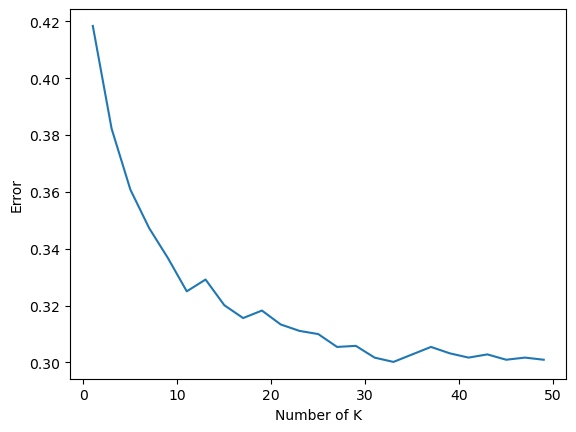

In [660]:
# Plotting graph for Number of K vs. MSE
plt.plot(neighbors, MSE)
plt.xlabel("Number of K")
plt.ylabel("Error")
plt.show()

Implementing code required to run **KNN Classifier** with domain knowledge

In [661]:
# Fitting KNN classifier to training set with Dom_Knowledge
KNN_classifier = KNeighborsClassifier(n_neighbors=33, metric= 'minkowski',p=2)
KNN_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=33)

In [662]:
# Predicting test set results for KNN with Dom_Knowledge
knnY_pred = KNN_classifier.predict(X_test) 
print(knnY_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 

In [663]:
# Displaying Confusion Matrix for KNN with Dom_Knowledge  
confusion_matrix(Y_test,knnY_pred)

array([[  3, 225],
       [  4, 566]])

In [664]:
# Displaying Classification Report for KNN with Dom_Knowledge  
classification_report(Y_test,knnY_pred)

'              precision    recall  f1-score   support\n\n           0       0.43      0.01      0.03       228\n           1       0.72      0.99      0.83       570\n\n    accuracy                           0.71       798\n   macro avg       0.57      0.50      0.43       798\nweighted avg       0.63      0.71      0.60       798\n'

In [665]:
# Displaying accuracy score of KNN Classifier with Dom_Knowledge
accuracy_score(Y_test, knnY_pred)

0.7130325814536341

In [666]:
# Displaying precision score of KNN Classifier with Dom_Knowledge 
precision_score(Y_test, knnY_pred)

0.7155499367888748

In [667]:
# Displaying recall score of KNN Classifier with Dom_Knowledge
recall_score(Y_test, knnY_pred)

0.9929824561403509

In [668]:
# Displaying f1-score of KNN Classifier with Dom_Knowledge
f1_score(Y_test, knnY_pred)

0.8317413666421749

Implementing code required to run **SVM Classifier** with domain knowledge

In [669]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [670]:
# Predicting test set results for SVM with Dom_Knowledge
svcY_pred = svc.predict(X_test)
print(svcY_pred)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 

In [671]:
# Displaying Confusion Matrix for SVM with Dom_Knowledge  
confusion_matrix(Y_test, svcY_pred)

array([[ 13, 215],
       [ 24, 546]])

In [672]:
# Displaying Classification Report for SVM with Dom_Knowledge  
classification_report(Y_test, svcY_pred)

'              precision    recall  f1-score   support\n\n           0       0.35      0.06      0.10       228\n           1       0.72      0.96      0.82       570\n\n    accuracy                           0.70       798\n   macro avg       0.53      0.51      0.46       798\nweighted avg       0.61      0.70      0.61       798\n'

In [673]:
# Displaying accuracy score of SVM Classifier with Dom_Knowledge
accuracy_score(Y_test, svcY_pred)

0.7005012531328321

In [674]:
# Displaying precision score of SVM Classifier with Dom_Knowledge 
precision_score(Y_test, svcY_pred)

0.7174770039421814

In [675]:
# Displaying recall score of SVM Classifier with Dom_Knowledge
recall_score(Y_test, svcY_pred)

0.9578947368421052

In [676]:
# Displaying f1-score of SVM Classifier with Dom_Knowledge
f1_score(Y_test, svcY_pred)

0.820435762584523

In [677]:
# Defining x and y variables for data without domain knowledge
x = State_Counties.drop(["Alcohol-Impaired Driving Deaths %","Risk Level","white_not_hispanic_2019 %"],axis=1) # Contains independent variables
y = State_Counties["Risk Level"] # Contains dependent variable

In [678]:
# Splitting dataset without domain knowledge into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Implementing code required to run **Logistic Regression Classifier** without domain knowledge

In [679]:
# Training model on training set without Dom_Knowledge
logModel=LogisticRegression()
logModel.fit(x_train,y_train)

/Users/TejasV/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [680]:
# Predicting test set results for Logistic Regression without Dom_Knowledge
logY_pred = logModel.predict(x_test) 
print(logY_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 

In [681]:
# Displaying Confusion Matrix for Logistic Regression without Dom_Knowledge
confusion_matrix(y_test,logY_pred)

array([[ 16, 212],
       [ 16, 554]])

In [682]:
# Displaying Classification Report for Logistic Regression without Dom_Knowledge
classification_report(y_test,logY_pred)

'              precision    recall  f1-score   support\n\n           0       0.50      0.07      0.12       228\n           1       0.72      0.97      0.83       570\n\n    accuracy                           0.71       798\n   macro avg       0.61      0.52      0.48       798\nweighted avg       0.66      0.71      0.63       798\n'

In [683]:
# Displaying accuracy score of Logistic Regression Classifier without Dom_Knowledge
accuracy_score(y_test,logY_pred)

0.7142857142857143

In [684]:
# Displaying precision score of Logistic Regression Classifier without Dom_Knowledge
precision_score(y_test,logY_pred)

0.7232375979112271

In [685]:
# Displaying recall score of Logistic Regression Classifier without Dom_Knowledge
recall_score(y_test,logY_pred)

0.9719298245614035

In [686]:
# Displaying f1-score of Logistic Regression Classifier without Dom_Knowledge
f1_score(y_test,logY_pred)

0.8293413173652694

Implementing code required to run **Random Forest Classifier** without domain knowledge

In [687]:
# Random Forest Model without Dom_Knowledge
randForest_Model = RandomForestClassifier(n_estimators = 500, random_state = 0) #Instantiating Model
randForest_Model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [688]:
# Checking training data accuracy score of Random Forest Model without Dom_Knowledge
randForest_Model.score(x_train,y_train)

1.0

In [689]:
# Predicting test set results for Random Forest without Dom_Knowledge
randForestY_pred = randForest_Model.predict(x_test) 
print(randForestY_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 

In [690]:
# Displaying Confusion Matrix for Random Forest without Dom_Knowledge
confusion_matrix(y_test,randForestY_pred)

array([[ 24, 204],
       [ 19, 551]])

In [691]:
# Displaying Classification Report for Random Forest without Dom_Knowledge
classification_report(y_test,randForestY_pred)

'              precision    recall  f1-score   support\n\n           0       0.56      0.11      0.18       228\n           1       0.73      0.97      0.83       570\n\n    accuracy                           0.72       798\n   macro avg       0.64      0.54      0.50       798\nweighted avg       0.68      0.72      0.64       798\n'

In [692]:
# Displaying accuracy score of Random Forest Classifier without Dom_Knowledge
accuracy_score(y_test, randForestY_pred)

0.7205513784461153

In [693]:
# Displaying precision score of Random Forest Classifier without Dom_Knowledge
precision_score(y_test, randForestY_pred)

0.7298013245033113

In [694]:
# Displaying recall score of Random Forest Classifier without Dom_Knowledge
recall_score(y_test, randForestY_pred)

0.9666666666666667

In [695]:
# Displaying f1-score of Random Forest Classifier without Dom_Knowledge
f1_score(y_test, randForestY_pred)

0.8316981132075472

Implementing code required to run **Decision Tree Classifier** without domain knowledge

In [696]:
# Decision Tree Model without Dom_Knowledge
dTree_Model = DecisionTreeClassifier(random_state = 0).fit(x_train,y_train)

In [697]:
# Predicting test set results for Decision Tree without Dom_Knowledge
dTreeY_pred = dTree_Model.predict(x_test) 
print(dTreeY_pred)

[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 

In [698]:
# Displaying Confusion Matrix for Decision Tree without Dom_Knowledge
confusion_matrix(y_test,dTreeY_pred)

array([[ 79, 149],
       [154, 416]])

In [699]:
# Checking training data accuracy score of Decision Tree Model without Dom_Knowledge
dTree_Model.score(x_train,y_train)

1.0

In [700]:
# Displaying Classification Report for Decision Tree without Dom_Knowledge
classification_report(y_test,dTreeY_pred)

'              precision    recall  f1-score   support\n\n           0       0.34      0.35      0.34       228\n           1       0.74      0.73      0.73       570\n\n    accuracy                           0.62       798\n   macro avg       0.54      0.54      0.54       798\nweighted avg       0.62      0.62      0.62       798\n'

In [701]:
# Displaying accuracy score of Decision Tree Classifier without Dom_Knowledge
accuracy_score(y_test, dTreeY_pred)

0.6203007518796992

In [702]:
# Displaying precision score of Decision Tree Classifier without Dom_Knowledge
precision_score(y_test, dTreeY_pred)

0.736283185840708

In [703]:
# Displaying recall score of Decision Tree Classifier without Dom_Knowledge
recall_score(y_test, dTreeY_pred)

0.7298245614035088

In [704]:
# Displaying f1-score of Decision Tree Classifier without Dom_Knowledge
f1_score(y_test, dTreeY_pred)

0.7330396475770926

Implementing code required to run **KNN Classifier** without domain knowledge

In [705]:
# Fitting KNN classifier to training set without Dom_Knowledge
KNN_classifier = KNeighborsClassifier(n_neighbors=33, metric= 'minkowski',p=2)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [706]:
# Predicting test set results for KNN without Dom_Knowledge
knnY_pred = KNN_classifier.predict(x_test) 
print(knnY_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 

In [707]:
# Displaying Confusion Matrix for KNN without Dom_Knowledge  
confusion_matrix(y_test,knnY_pred)

array([[  3, 225],
       [  4, 566]])

In [708]:
# Displaying Classification Report for KNN without Dom_Knowledge  
classification_report(y_test,knnY_pred)

'              precision    recall  f1-score   support\n\n           0       0.43      0.01      0.03       228\n           1       0.72      0.99      0.83       570\n\n    accuracy                           0.71       798\n   macro avg       0.57      0.50      0.43       798\nweighted avg       0.63      0.71      0.60       798\n'

In [709]:
# Displaying accuracy score of KNN Classifier without Dom_Knowledge
accuracy_score(y_test, knnY_pred)

0.7130325814536341

In [710]:
# Displaying precision score of KNN Classifier without Dom_Knowledge 
precision_score(y_test, knnY_pred)

0.7155499367888748

In [711]:
# Displaying recall score of KNN Classifier without Dom_Knowledge
recall_score(y_test, knnY_pred)

0.9929824561403509

In [712]:
# Displaying f1-score of KNN Classifier without Dom_Knowledge
f1_score(y_test, knnY_pred)

0.8317413666421749

Implementing code required to run **SVM Classifier** without domain knowledge

In [713]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [714]:
# Predicting test set results for SVM without Dom_Knowledge
svcY_pred = svc.predict(x_test)
print(svcY_pred)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 

In [715]:
# Displaying Confusion Matrix for SVM without Dom_Knowledge  
confusion_matrix(y_test, svcY_pred)

array([[ 14, 214],
       [ 30, 540]])

In [716]:
# Displaying Classification Report for SVM without Dom_Knowledge  
classification_report(y_test, svcY_pred)

'              precision    recall  f1-score   support\n\n           0       0.32      0.06      0.10       228\n           1       0.72      0.95      0.82       570\n\n    accuracy                           0.69       798\n   macro avg       0.52      0.50      0.46       798\nweighted avg       0.60      0.69      0.61       798\n'

In [717]:
# Displaying accuracy score of SVM Classifier without Dom_Knowledge
accuracy_score(y_test, svcY_pred)

0.6942355889724311

In [718]:
# Displaying precision score of SVM Classifier without Dom_Knowledge 
precision_score(y_test, svcY_pred)

0.7161803713527851

In [719]:
# Displaying recall score of SVM Classifier without Dom_Knowledge
recall_score(y_test, svcY_pred)

0.9473684210526315

In [720]:
# Displaying f1-score of SVM Classifier without Dom_Knowledge
f1_score(y_test, svcY_pred)

0.8157099697885195

Creating array named **conditions** to store **Non-Hispanic White %** threshold values for level of classification

In [721]:
conditions = [
    (State_Counties["white_not_hispanic_2019 %"] < 59.3),
    (State_Counties["white_not_hispanic_2019 %"] >= 59.3)
]

Creating array named **values** to store **low** and **high** Non-Hispanic White population counties based on threshold

In [722]:
values = [0,1]

Adding new column **white_not_hispanicPopLevel** to classify counties non-hispanic white population as **low = 0** or **high = 1**

In [723]:
State_Counties["white_not_hispanicPopLevel"] = np.select(conditions, values)
State_Counties

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level,white_not_hispanicPopLevel
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35,6.5,32,63,16,13,38,12,61,...,149,15,87,41,75,83,89,74.6,1,1
AL: Baldwin,32,30,7.4,28,75,13,8,36,14,66,...,408,12,83,38,77,85,90,83.1,1,1
AL: Barbour,38,40,5.7,42,50,21,10,41,17,38,...,106,15,84,37,62,65,75,45.8,1,0
AL: Bibb,21,41,7.6,38,11,16,0,40,14,38,...,20,11,88,55,75,76,81,74.5,1,1
AL: Blount,15,39,7.8,33,23,15,3,39,18,56,...,279,10,88,60,76,80,83,86.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY: Sublette,40,26,8.1,23,45,12,4,33,16,66,...,7,6,70,27,83,88,95,89.3,1,1
WY: Sweetwater,18,34,8.1,25,83,11,5,35,16,62,...,135,10,76,19,75,87,93,79.6,0,1
WY: Uinta,17,30,8.3,28,79,13,1,36,16,58,...,14,11,79,18,77,91,93,87.5,0,1


In [724]:
State_Counties["white_not_hispanicPopLevel"].value_counts()

1    2154
0     504
Name: white_not_hispanicPopLevel, dtype: int64

In [725]:
import aif360
from aif360.metrics import ClassificationMetric
from common_utils import compute_metrics
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
np.random.seed(0)
from tqdm import tqdm

In [726]:
State_Counties.head()

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Annual Average Violent Crimes,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic_2019 %,Risk Level,white_not_hispanicPopLevel
County,,,,,,,,,,,,,,,,,,,,,
AL: Autauga,32,35,6.5,32,63,16,13,38,12,61,...,149,15,87,41,75,83,89,74.6,1,1
AL: Baldwin,32,30,7.4,28,75,13,8,36,14,66,...,408,12,83,38,77,85,90,83.1,1,1
AL: Barbour,38,40,5.7,42,50,21,10,41,17,38,...,106,15,84,37,62,65,75,45.8,1,0
AL: Bibb,21,41,7.6,38,11,16,0,40,14,38,...,20,11,88,55,75,76,81,74.5,1,1
AL: Blount,15,39,7.8,33,23,15,3,39,18,56,...,279,10,88,60,76,80,83,86.9,0,1


In [727]:
# one hot encode helpful columns
categoricalFeatures = ["Adult Obesity %", "Food Environment Index (0-10)", "Physically Inactive Adults %", "Access to Exercise Opportunities %", "Food Insecure %", "Limited Access to Healthy Foods %", "Insufficient Sleep % (Avg Hours < 7)", "Uninsured Adults % (Age < 65)", "Some College % (Adults 25-44)", "School Segregation Index", "Unemployment % (Age >= 16)", "Median Household Income", "Children Single-Parent Households %", "Annual Average Violent Crimes", "Severe Housing Problems %", "Drive Alone to Work %", "Drive Alone Long Commute % (Minutes > 30)", "Homeowners %", "Broadband Internet Access %", "High School Completion % (Adults >= 25)"]

for feature in categoricalFeatures:
    onehot = pd.get_dummies(State_Counties[feature], prefix=feature)
    df = State_Counties.drop(feature, axis=1)
    df = State_Counties.join(onehot)

In [728]:
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=0,
    unfavorable_label=1,
    df = State_Counties,
    label_names=["Risk Level"],
    protected_attribute_names=["white_not_hispanicPopLevel"])

In [729]:
#dividing the dataset into train and test
dataset_orig_train, dataset_orig_test = binaryLabelDataset.split([0.7], shuffle=True)
# Priviliged group: White (1)
# Unpriviliged group: Non-White (0)
privileged_groups = [{"white_not_hispanicPopLevel": 1}]
unprivileged_groups = [{"white_not_hispanicPopLevel": 0}]

In [730]:
def bias_metrics_lr(privileged_groups, unprivileged_groups):
    # train test split
    dataset_orig_train, dataset_orig_vt = binaryLabelDataset.split([0.7], shuffle=True)
    dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True)

**Logistic Regression** classifier and predictions **Before Reweighing**

In [731]:
    scale_orig = StandardScaler()
    X_train = scale_orig.fit_transform(dataset_orig_train.features)
    y_train = dataset_orig_train.labels.ravel()
    w_train = dataset_orig_train.instance_weights.ravel()

    lmod = LogisticRegression()
    lmod.fit(X_train, y_train,
             sample_weight=dataset_orig_train.instance_weights)
    y_train_pred = lmod.predict(X_train)

    # positive class index
    pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

    dataset_orig_train_pred = dataset_orig_train.copy()
    dataset_orig_train_pred.labels = y_train_pred

In [732]:
    dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
    X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
    y_valid = dataset_orig_valid_pred.labels
    dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

    dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
    X_test = scale_orig.transform(dataset_orig_test_pred.features)
    y_test = dataset_orig_test_pred.labels
    dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

Validating original dataset **Logistic Regression**

In [733]:
    num_thresh = 100
    ba_arr = np.zeros(num_thresh)
    class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
    for idx, class_thresh in enumerate(class_thresh_arr):
    
        fav_inds = dataset_orig_valid_pred.scores > class_thresh
        dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
        dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
        classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                                dataset_orig_valid_pred, 
                                                unprivileged_groups=unprivileged_groups,
                                                privileged_groups=privileged_groups)
    
        ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                        +classified_metric_orig_valid.true_negative_rate())

    best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
    best_class_thresh = class_thresh_arr[best_ind]

    print("Best balanced accuracy (no reweighing) = %.4f" % np.max(ba_arr))
    print("Optimal classification threshold (no reweighing) = %.4f" % best_class_thresh)

Best balanced accuracy (no reweighing) = 0.9947
Optimal classification threshold (no reweighing) = 0.3862


Calculating all metrics for **Logistic Regression** in original dataset

In [734]:
    bal_acc_arr_orig = []
    disp_imp_arr_orig = []
    avg_odds_diff_arr_orig = []

    print("Classification threshold used = %.4f" % best_class_thresh)
    for thresh in tqdm(class_thresh_arr):
    
        if thresh == best_class_thresh:
            disp = True
        else:
            disp = False
    
        fav_inds = dataset_orig_test_pred.scores > thresh
        dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
        dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label
    
        metric_test_bef = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                                          unprivileged_groups, privileged_groups,
                                          disp = disp)

        bal_acc_arr_orig.append(metric_test_bef["Balanced accuracy"])
        avg_odds_diff_arr_orig.append(metric_test_bef["Average odds difference"])
        disp_imp_arr_orig.append(metric_test_bef["Disparate impact"])

Classification threshold used = 0.3862


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1006.38it/s]

Balanced accuracy = 0.9869
Statistical parity difference = 0.0021
Disparate impact = 1.0068
Average odds difference = 0.0066
Equal opportunity difference = 0.0104
Theil index = 0.0072


**Logistic Regression** classifier and predictions **After Reweighing**

In [735]:
    scale_transf = StandardScaler()
    X_train = scale_transf.fit_transform(dataset_transf_train.features)
    y_train = dataset_transf_train.labels.ravel()

    lmod = LogisticRegression()
    lmod.fit(X_train, y_train,
            sample_weight=dataset_transf_train.instance_weights)
    y_train_pred = lmod.predict(X_train)

In [736]:
    dataset_transf_test_pred = dataset_orig_test.copy(deepcopy=True)
    X_test = scale_transf.fit_transform(dataset_transf_test_pred.features)
    y_test = dataset_transf_test_pred.labels
    dataset_transf_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

Calculating all metrics for **Logistic Regression** in transformed dataset

In [737]:
    bal_acc_arr_transf = []
    disp_imp_arr_transf = []
    avg_odds_diff_arr_transf = []

    print("Classification threshold used = %.4f" % best_class_thresh)
    for thresh in tqdm(class_thresh_arr):
    
        if thresh == best_class_thresh:
            disp = True
        else:
            disp = False
        
        fav_inds = dataset_transf_test_pred.scores > thresh
        dataset_transf_test_pred.labels[fav_inds] = dataset_transf_test_pred.favorable_label
        dataset_transf_test_pred.labels[~fav_inds] = dataset_transf_test_pred.unfavorable_label
    
        metric_test_aft = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                                          unprivileged_groups, privileged_groups,
                                          disp = disp)

        bal_acc_arr_transf.append(metric_test_aft["Balanced accuracy"])
        avg_odds_diff_arr_transf.append(metric_test_aft["Average odds difference"])
        disp_imp_arr_transf.append(metric_test_aft["Disparate impact"])

Classification threshold used = 0.3862


  0%|                                                   | 0/100 [00:00<?, ?it/s]

Balanced accuracy = 0.9767
Statistical parity difference = -0.0015
Disparate impact = 0.9950
Average odds difference = -0.0042
Equal opportunity difference = -0.0177
Theil index = 0.0134


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 903.24it/s]


In [738]:
def bias_metrics_rf(privileged_groups, unprivileged_groups):
    # train test split
    dataset_orig_train, dataset_orig_vt = binaryLabelDataset.split([0.7], shuffle=True)
    dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True)

**Random Forest** classifier and predictions **Before Reweighing**

In [739]:
    scale_orig = StandardScaler()
    X_train = scale_orig.fit_transform(dataset_orig_train.features)
    y_train = dataset_orig_train.labels.ravel()
    w_train = dataset_orig_train.instance_weights.ravel()

    rf = RandomForestClassifier(n_estimators = 500, random_state = 0)
    rf.fit(X_train, y_train);
    y_train_pred = rf.predict(X_train)

    # positive class index
    pos_ind = np.where(rf.classes_ == dataset_orig_train.favorable_label)[0][0]

    dataset_orig_train_pred = dataset_orig_train.copy()
    dataset_orig_train_pred.labels = y_train_pred

In [740]:
    dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
    X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
    y_valid = dataset_orig_valid_pred.labels
    dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

    dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
    X_test = scale_orig.transform(dataset_orig_test_pred.features)
    y_test = dataset_orig_test_pred.labels
    dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

Validating original dataset **Random Forest**

In [741]:
    num_thresh = 100
    ba_arr = np.zeros(num_thresh)
    class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
    for idx, class_thresh in enumerate(class_thresh_arr):
    
        fav_inds = dataset_orig_valid_pred.scores > class_thresh
        dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
        dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
        classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                                 dataset_orig_valid_pred, 
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
        ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                        +classified_metric_orig_valid.true_negative_rate())

        best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
        best_class_thresh = class_thresh_arr[best_ind]

    print("Best balanced accuracy (no reweighing) = %.4f" % np.max(ba_arr))
    print("Optimal classification threshold (no reweighing) = %.4f" % best_class_thresh)

Best balanced accuracy (no reweighing) = 0.9930
Optimal classification threshold (no reweighing) = 0.3664


Calculating all metrics for **Random Forest** in original dataset

In [742]:
    bal_acc_arr_orig = []
    disp_imp_arr_orig = []
    avg_odds_diff_arr_orig = []

    print("Classification threshold used = %.4f" % best_class_thresh)
    for thresh in tqdm(class_thresh_arr):
    
        if thresh == best_class_thresh:
            disp = True
        else:
            disp = False
    
        fav_inds = dataset_orig_test_pred.scores > thresh
        dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
        dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label
    
        metric_test_bef = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                                          unprivileged_groups, privileged_groups,
                                          disp = disp)

        bal_acc_arr_orig.append(metric_test_bef["Balanced accuracy"])
        avg_odds_diff_arr_orig.append(metric_test_bef["Average odds difference"])
        disp_imp_arr_orig.append(metric_test_bef["Disparate impact"])

Classification threshold used = 0.3664


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1081.23it/s]

Balanced accuracy = 0.9833
Statistical parity difference = -0.0040
Disparate impact = 0.9870
Average odds difference = 0.0023
Equal opportunity difference = 0.0104
Theil index = 0.0090


**Random Forest** classifier and predictions **After Reweighing**

In [743]:
    scale_transf = StandardScaler()
    X_train = scale_transf.fit_transform(dataset_transf_train.features)
    y_train = dataset_transf_train.labels.ravel()

    rf = RandomForestClassifier(n_estimators = 500, random_state = 0)
    rf.fit(X_train, y_train);
    y_train_pred = rf.predict(X_train)

In [744]:
    dataset_transf_test_pred = dataset_orig_test.copy(deepcopy=True)
    X_test = scale_transf.fit_transform(dataset_transf_test_pred.features)
    y_test = dataset_transf_test_pred.labels
    dataset_transf_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

Calculating all metrics for **Random Forest** in transformed dataset

In [745]:
    bal_acc_arr_transf = []
    disp_imp_arr_transf = []
    avg_odds_diff_arr_transf = []

    print("Classification threshold used = %.4f" % best_class_thresh)
    for thresh in tqdm(class_thresh_arr):
        
        if thresh == best_class_thresh:
            disp = True
        else:
            disp = False
        
        fav_inds = dataset_transf_test_pred.scores > thresh
        dataset_transf_test_pred.labels[fav_inds] = dataset_transf_test_pred.favorable_label
        dataset_transf_test_pred.labels[~fav_inds] = dataset_transf_test_pred.unfavorable_label
        
        metric_test_aft = compute_metrics(dataset_orig_test, dataset_transf_test_pred, 
                                        unprivileged_groups, privileged_groups,
                                        disp = disp)

        bal_acc_arr_transf.append(metric_test_aft["Balanced accuracy"])
        avg_odds_diff_arr_transf.append(metric_test_aft["Average odds difference"])
        disp_imp_arr_transf.append(metric_test_aft["Disparate impact"])

Classification threshold used = 0.3664


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1053.61it/s]

Balanced accuracy = 0.9792
Statistical parity difference = -0.0075
Disparate impact = 0.9747
Average odds difference = -0.0116
Equal opportunity difference = -0.0281
Theil index = 0.0118


Comparing percentage of **Favorable Results** for both **Privileged and Unprivileged Groups** before Reweighing

In [746]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.032738


In [747]:
# Applying Reweighing Algorithm
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(dataset_orig_train)
dataset_transf_train = RW.transform(dataset_orig_train)

Comparing percentage of **Favorable Results** for both **Privileged and Unprivileged Groups** after Reweighing

In [748]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000
